In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [2]:
Startups=pd.read_csv("C:/Users/thang/Downloads/50_Startups.csv")
Startups

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
Startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
Startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
Startups.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
Startups.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [7]:
df=Startups[['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']]
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [8]:
# correlation

df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [9]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


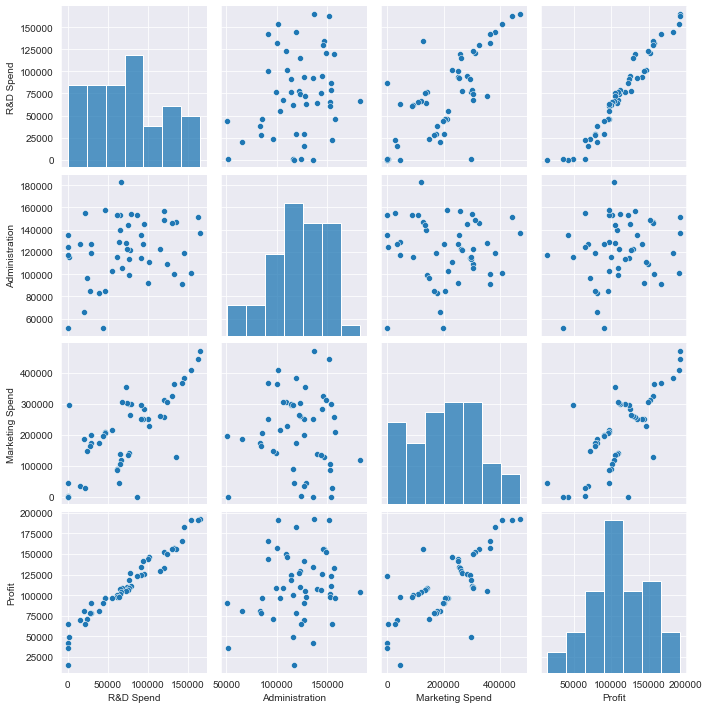

In [10]:
# pair plot
sns.set_style(style="darkgrid")
sns.pairplot(df)

<AxesSubplot:>

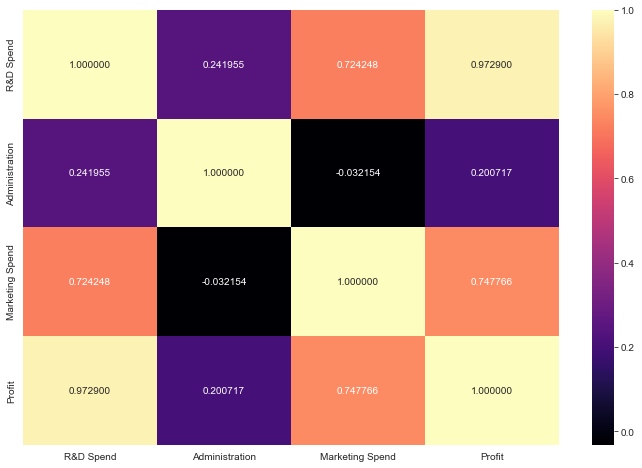

In [11]:
# Heatmap fmt =".no .of decimals"
fix, ax=plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(),cmap="magma",annot=True,fmt="3f")

# Graphs(Subplot)

<AxesSubplot:xlabel='Profit', ylabel='Marketing Spend'>

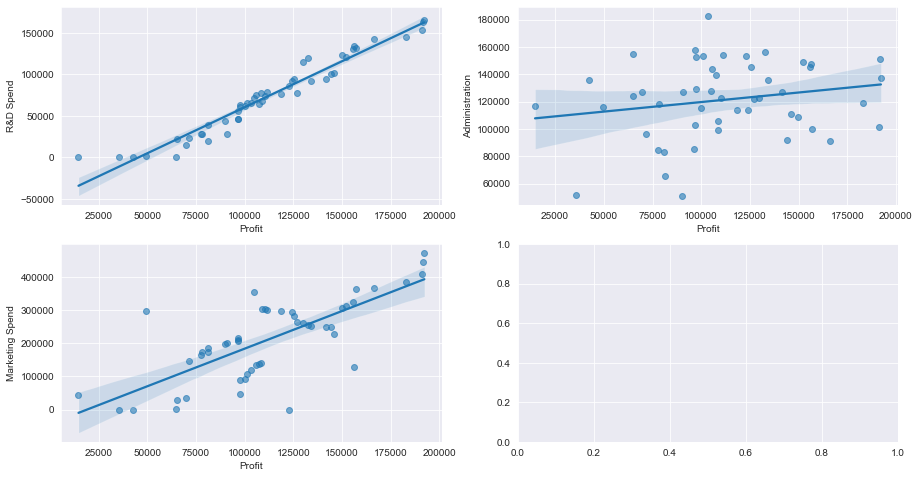

In [12]:
f,axes=plt.subplots(2,2, figsize=(15,8))
sns.regplot(x="Profit",y="R&D Spend",data=df,scatter_kws={"alpha":0.6},ax=axes[0,0])
sns.regplot(x="Profit",y="Administration",data=df,scatter_kws={"alpha":0.6},ax=axes[0,1])
sns.regplot(x="Profit",y="Marketing Spend",data=df,scatter_kws={"alpha":0.6},ax=axes[1,0])
#sns.regplot(x="Profit",y="State",data=df,scatter_kws={"alpha":0.6},ax=axes[1,1])

# Preparing a model

In [13]:
d1=Startups.rename({"R&D Spend":"Rand_Spend"},axis=1)
startup=d1.rename({'Marketing Spend':'Marketing_Spend'},axis=1)
startup.head()

,Rand_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [14]:
startup.columns

Index(['Rand_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'], dtype='object')

In [15]:
#Build model
import statsmodels.formula.api as smf 
model= smf.ols("Profit~Rand_Spend+Administration+Marketing_Spend",data=startup).fit()

In [16]:
#Coefficients
model.params

Intercept          50122.192990
Rand_Spend             0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [17]:
#t and p-Values
print(model.tvalues, '\n',model.pvalues)

Intercept           7.626218
Rand_Spend         17.846374
Administration     -0.525507
Marketing_Spend     1.655077
dtype: float64 
 Intercept          1.057379e-09
Rand_Spend         2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64


In [18]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

# Calculating VIF

In [19]:
rsq_Rand_Spend= smf.ols('Rand_Spend~Administration+Marketing_Spend',data=startup).fit().rsquared  
vif_Rand_Spend= 1/(1-rsq_Rand_Spend)

rsq_Administration= smf.ols('Administration~Rand_Spend+Marketing_Spend',data=startup).fit().rsquared  
vif_Administration = 1/(1-rsq_Administration) 

rsq_Marketing_Spend= smf.ols('Marketing_Spend~Rand_Spend+Administration',data=startup).fit().rsquared  
vif_Marketing_Spend = 1/(1-rsq_Marketing_Spend) 

#rsq_State = smf.ols('State~Rand_Spend+Administration+Marketing_Spend',data=startup).fit().rsquared  
#vif_State = 1/(1-rsq_State) 

# Storing vif values in a data frame
d1 = {'Variables':['Rand_Spend','Administration','Marketing_Spend'],'VIF':[vif_Rand_Spend,vif_Administration,vif_Marketing_Spend]}
Vif_frame =pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Rand_Spend,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


# Residual Analysis

## Test for Normality of Residuals(Q-Q Plot)

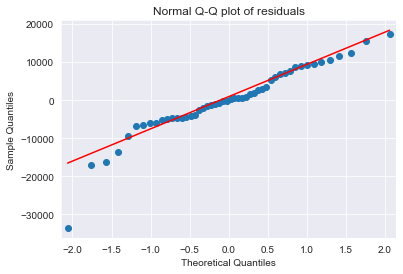

In [20]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [21]:
residuals=model.resid
residuals

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

In [22]:
residuals.mean()

3.958120942115784e-11

In [23]:
predictions=model.fittedvalues
predictions

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


# Residual Plot for Homoscedasticity

In [24]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

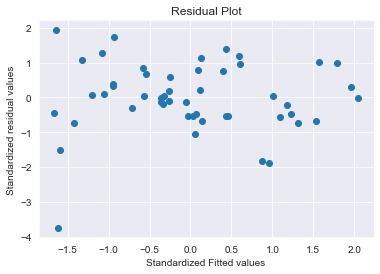

In [25]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors

eval_env: 1


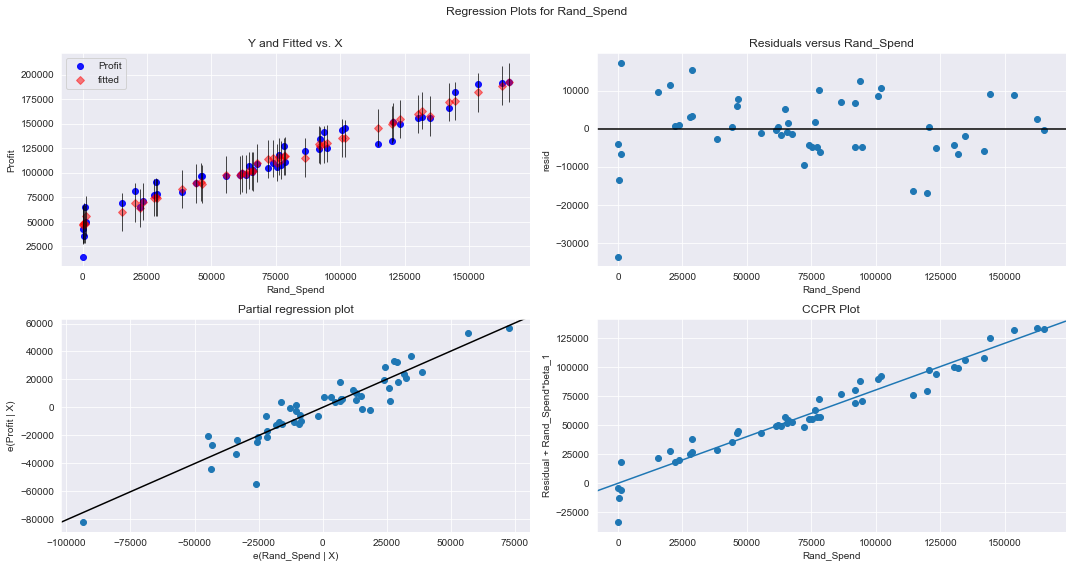

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Rand_Spend", fig=fig)
plt.show()

eval_env: 1


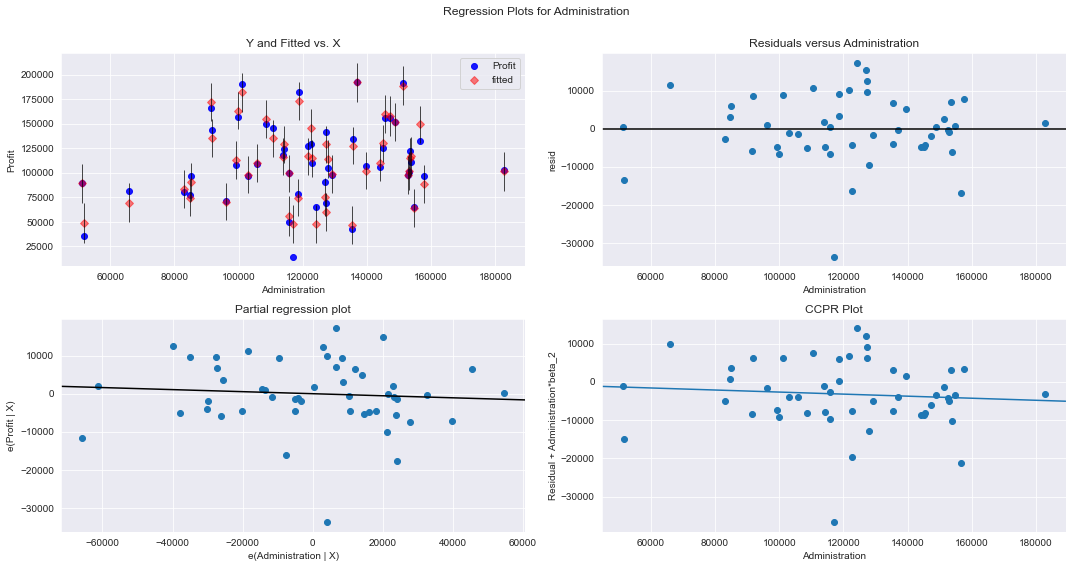

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

eval_env: 1


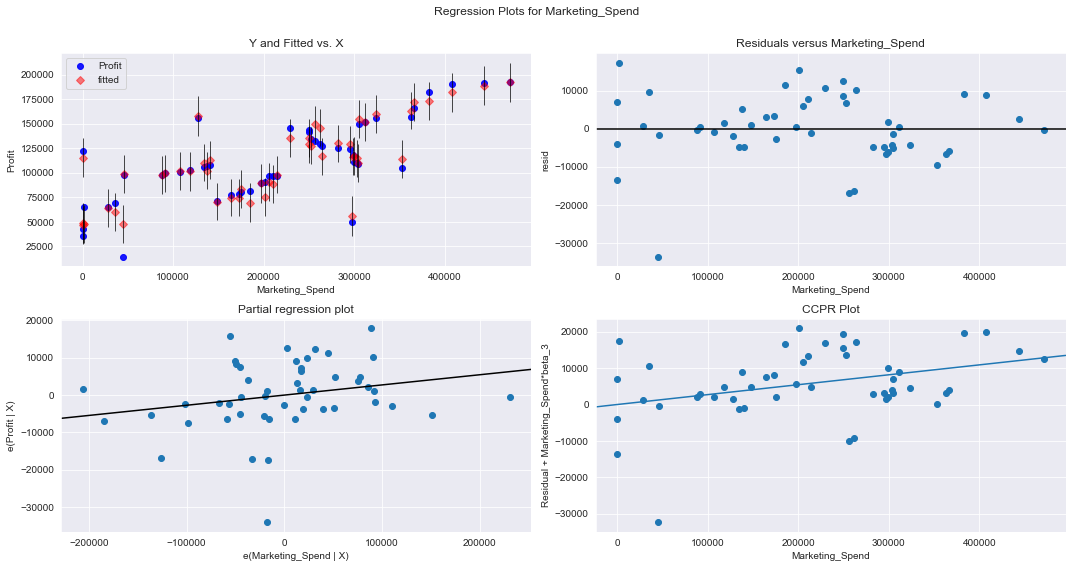

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

# Model Deletion Diagnostics

### Detecting Influncers/Outliers

In [29]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

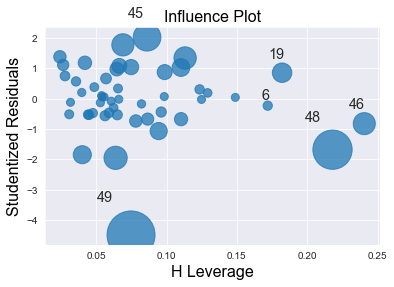

In [30]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [31]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543267)

### High Influence points

In [32]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543267)

### Since the value is <1 , we doesn't need to do the diagnostic process and finalize the model

In [34]:
(model.rsquared,model.aic)

(0.9507459940683246, 1058.7714985998055)

In [35]:
model.params

Intercept          50122.192990
Rand_Spend             0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

#### Inference: Y = 50122.2 +0.80571505X1 -0.02681597X2 +0.02722806X3 is best suited model.